In [1]:
import pandas as pd
from mmcv import Config
from utils import *

config_path = '/Users/KC/My Drive/soundmouse/config/cfg_setting.py'
cfg = Config.fromfile(config_path)
filename = 'data.csv'
path = cfg.filepath_save + filename
data = pd.read_csv(path)
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,live,outlier
0,-1.509609,-0.950819,1.371512,-1.484222,0.640996,-0.381994,1.196042,2.235733,2.802696,-1.827616,-1.154106,4.978012,0.292319,0,1
1,1.588714,-0.458713,0.515464,-0.133135,0.640996,1.764213,0.532930,-0.538791,-0.250113,1.637829,-1.805774,-0.384110,0.292319,0,0
2,-1.228465,-1.121164,-0.625932,-0.558317,0.640996,-0.397308,1.140341,2.346335,-0.606778,-1.904319,-0.197504,2.247228,0.292319,0,0
3,-1.532560,-0.579847,-0.055234,0.418419,0.640996,-0.388801,1.156256,-0.538704,1.085869,-1.422624,-0.530532,-0.141447,-1.633903,0,1
4,-0.712078,-1.018957,-0.625932,0.280751,0.640996,-0.374054,1.129731,-0.538786,0.167003,-1.085130,-0.479878,-0.498083,0.292319,0,0


In [14]:
#data preparation and preprocessiong                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
print('is there null value?:\n', data.isna().sum()) # check null values

is there null value?:
 danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
live                0
outlier             0
dtype: int64


In [16]:
data.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature      float64
live                  int64
outlier               int64
dtype: object

In [2]:
#basic info
fprint('outlier', data['outlier'].sum())
fprint('data shape',data.shape)
fprint('data shape [train]', data.drop(columns=cfg.drop_cols).shape)
fprint('data shape [label]', data[cfg.label_col].shape)

outlier             : 24747 
data shape          : (99000, 15) 
data shape [train]  : (99000, 13) 
data shape [label]  : (99000,) 


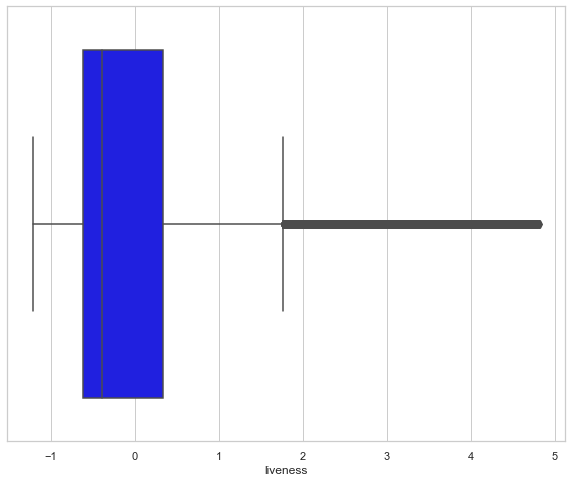

In [3]:
plot(df=data, x='liveness', plot_type='boxplot')

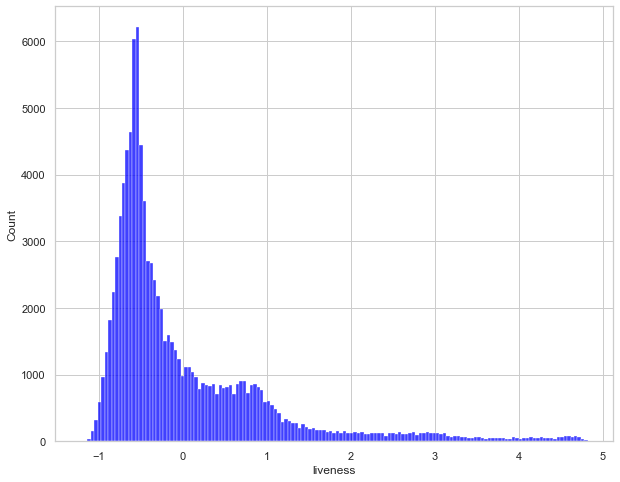

In [4]:
plot(df=data, x='liveness', plot_type='histplot')

In [5]:
df_print_info(data, 'liveness')

[max/min/mean  ]----------------------------------------
liveness max  : 4.8217818995868384 
liveness min  : -1.2173400946427997 
liveness mean : 4.721774037981196e-15 
[quantile      ]----------------------------------------
0.05   -0.854026
0.25   -0.617660
0.50   -0.395197
0.75    0.336268
0.95    2.216315
Name: liveness, dtype: float64


data is transformed from dataframe to numpy(matrix)

(99000, 14)
0  ...
1  ...
2  ...
3  ...
4  ...
5  ...
6  ...
7  ...
8  ...
9  ...
10  ...
11  ...
12  ...
13  ...


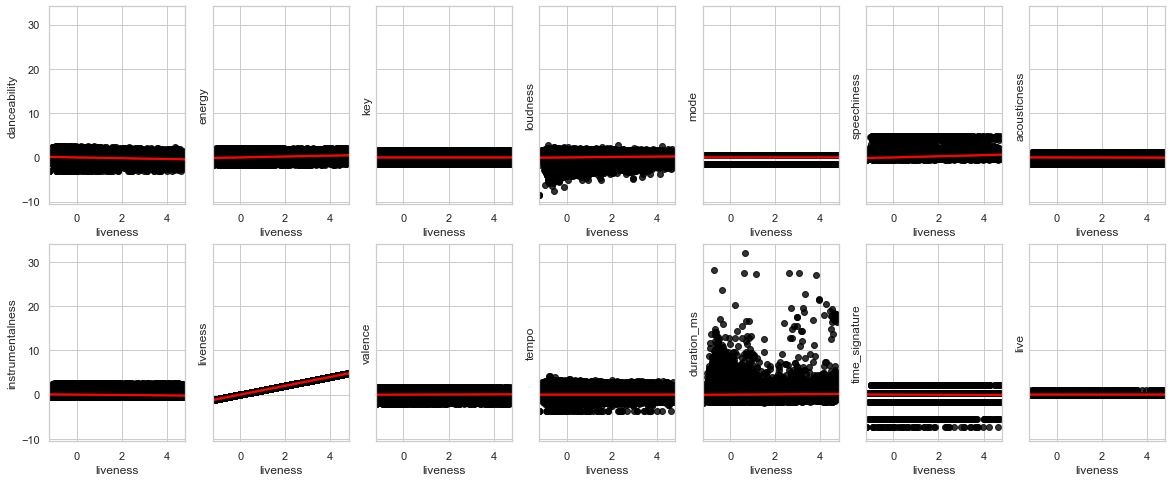

In [6]:
plot_data = data.drop(columns=['outlier'])
print(plot_data.shape)
multi_plot(plot_data, col_name='liveness', cols=7, rows=2)

In [7]:
corr = data.corr()
corr['outlier']

danceability       -0.050251
energy              0.119775
key                -0.001366
loudness            0.073484
mode               -0.000725
speechiness         0.117753
acousticness       -0.048837
instrumentalness   -0.061490
liveness            0.784705
valence             0.050513
tempo               0.009524
duration_ms         0.000636
time_signature     -0.009322
live                0.007537
outlier             1.000000
Name: outlier, dtype: float64

# Imbalanced data

## PCA before SMOTE

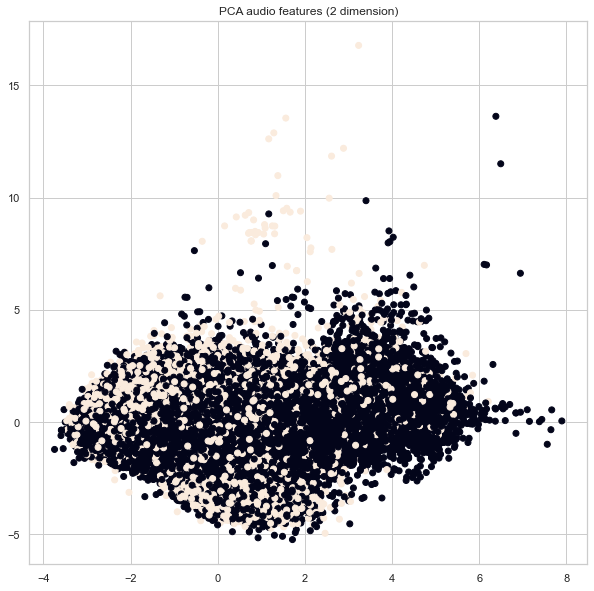

In [8]:
# PCA
from sklearn.decomposition import PCA
pca_y = data[cfg.label_col]
pca_x = data.drop(columns=cfg.drop_cols)
pca_y = pca_y.to_numpy().reshape(-1)
pca_x = pca_x.to_numpy()


pca = PCA(n_components=2)
pca.fit(pca_x)
pca_x = pca.transform(pca_x)
fig = plt.figure(1, figsize=(10, 10))
plt.scatter(pca_x[:,0],pca_x[:,1],c=pca_y)
plt.title('PCA audio features (2 dimension)')
plt.show()

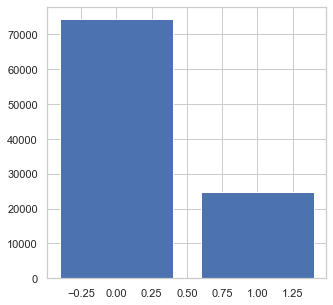

before SMOTE        : Counter({0: 74253, 1: 24747}) 


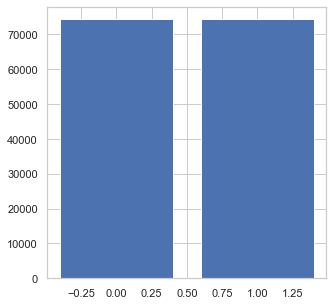

after SMOTE         : Counter({1: 74253, 0: 74253}) 
data columns        : Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object') 


In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [5, 5]
y = data[cfg.label_col]
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()
fprint('before SMOTE', counter)

oversampling=SMOTE(k_neighbors=1)

x=data.drop(columns=cfg.drop_cols)
x,y = oversampling.fit_resample(x, y)
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.show()
fprint('after SMOTE', counter)
fprint('data columns', x.keys())

### Transfromed dataframe to numpy

In [10]:
keys = x.keys()
x = x.to_numpy()
y = y.to_numpy().reshape(-1)
print(x.shape)
print(y.shape)

(148506, 13)
(148506,)


## PCA after SMOTE

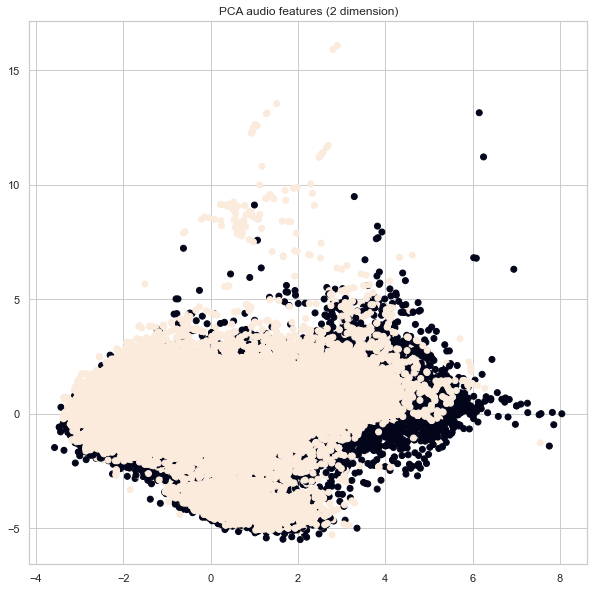

In [11]:
pca_y = y
pca_x = x
# pca_y = pca_y.to_numpy().reshape(-1)
# pca_x = pca_x.to_numpy()

pca = PCA(n_components=2)
pca.fit(pca_x)
pca_x = pca.transform(pca_x)
fig = plt.figure(1, figsize=(10, 10))
plt.scatter(pca_x[:,0],pca_x[:,1],c=pca_y)
plt.title('PCA audio features (2 dimension)')
plt.show()

# split

In [12]:
from sklearn.model_selection import train_test_split

x_tr, x_tt, y_tr, y_tt = train_test_split(x, y, test_size=0.2)
print(x_tr.shape, x_tt.shape, y_tr.shape, y_tt.shape)

(118804, 13) (29702, 13) (118804,) (29702,)


# XGBCclassfier

In [35]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, f1_score, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
import numpy as np


### gridsearchCV

In [27]:
model = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
# model.fit(x_tr, y_tr, verbose=True, early_stopping_rounds=10, eval_metric = 'aucpr', eval_set=[(x_tt, y_tt)])
print(model)

#k-fold stratified
k_fold=4
skf_cv = StratifiedKFold(n_splits=k_fold, shuffle=True)

params = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma':[0, 0.25, 1.0],
    'reg_lambda':[0, 1.0, 10.0]
}

grid = GridSearchCV(estimator = model, param_grid=params, cv=skf_cv, scoring='f1', verbose=5)
grid.fit(x_tr, y_tr)

print(grid.best_params_)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, seed=42, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
Fitting 4 folds for each of 81 candidates, totalling 324 fits
[CV 1/4] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0; total time=   6.9s
[CV 2/4] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0; total time=   8.8s
[CV 3/4] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=0; total time=   8.8s
[CV 4/4] END gamma=0, learning_rate

### Training Model 

In [36]:

#declare cross-validation
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=71)
train_x = x_tr
train_y = y_tr

res_accuracy = []
res_logloss = []
res_f1 = []
for k, (tr_idx, va_idx) in enumerate(skf.split(train_x, train_y)):
    print(f'{k} fold...')
    tr_x, va_x = train_x[tr_idx], train_x[va_idx]
    tr_y, va_y = train_y[tr_idx], train_y[va_idx]
    model = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42, gamma=0.25, learning_rate = 0.1, max_depth = 5, reg_lambda=0)
    model.fit(tr_x, tr_y, verbose=True, early_stopping_rounds=10, eval_metric = 'aucpr', eval_set=[(va_x, va_y)])   
    
    va_pred = model.predict_proba(va_x)[:, 1]
    va_pred = np.where( va_pred > 0.5, 1.0, 0.0)
    logloss = log_loss(va_y, va_pred)
    accuracy = balanced_accuracy_score(va_y, va_pred)
    f1 = f1_score(va_y, va_pred)
    res_logloss.append(logloss)
    res_accuracy.append(accuracy)
    res_f1.append(f1)
logloss = np.mean(res_logloss)
accuracy = np.mean(res_accuracy)
f1 = np.mean(res_f1)
print(f'logloss: {logloss:.4f}, accuracy: {accuracy:.4f}, f1: {f1:.4f}')


0 fold...
[0]	validation_0-aucpr:0.99201
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.99221
[2]	validation_0-aucpr:0.99255
[3]	validation_0-aucpr:0.99253
[4]	validation_0-aucpr:0.99315
[5]	validation_0-aucpr:0.99314
[6]	validation_0-aucpr:0.99359
[7]	validation_0-aucpr:0.99360
[8]	validation_0-aucpr:0.99362
[9]	validation_0-aucpr:0.99360
[10]	validation_0-aucpr:0.99361
[11]	validation_0-aucpr:0.99361
[12]	validation_0-aucpr:0.99362
[13]	validation_0-aucpr:0.99364
[14]	validation_0-aucpr:0.99365
[15]	validation_0-aucpr:0.99363
[16]	validation_0-aucpr:0.99363
[17]	validation_0-aucpr:0.99364
[18]	validation_0-aucpr:0.99366
[19]	validation_0-aucpr:0.99367
[20]	validation_0-aucpr:0.99370
[21]	validation_0-aucpr:0.99369
[22]	validation_0-aucpr:0.99368
[23]	validation_0-aucpr:0.99374
[24]	validation_0-aucpr:0.99374
[25]	validation_0-aucpr:0.99374
[26]	validation_0-aucpr:0.99383
[27]	validation_0-aucpr:0.99384
[28]	validation_0-aucpr:0.99346
[29]	v

### Result

In [37]:
predictions = model.predict_proba(x_tt)[:,1]
fprint('prob pred', predictions[:10])
y_pred = np.where(predictions>=0.5, 1, 0)
fprint('predictions', y_pred[:10])

y_true = y_tt
acc = accuracy_score(y_true, y_pred)

fprint('accuracy(%)',acc)

prob pred           : [0.29892868 0.7004769  0.7004769  0.6992024  0.7004769  0.7004769
 0.30030775 0.3230189  0.29892868 0.7004769 ] 
predictions         : [0 1 1 1 1 1 0 0 0 1] 
accuracy(%)         : 0.989495656858124 


In [38]:
def print_keys(keys):
    for i, key in enumerate(keys):
        print("{} : {}".format(i, key))

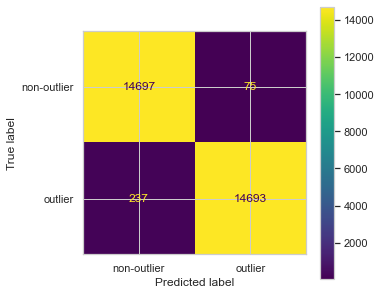

In [39]:
plot_confusion_matrix(model, x_tt, y_tt, display_labels=["non-outlier","outlier"])

**THIS IS A REFERENCE of AUDIO FEATURES**
- acousticness:<br>
    A confidence measure from 0.0 to 1.0 of **whether the track is acoustic**. 1.0 represents high confidence the track is acoustic.
    A URL to access the full audio analysis of this track. An access token is required to access this data.

- danceability:<br>
    Danceability describes **how suitable a track is for dancing** based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- duration_ms:<br>
    The duration of the track in milliseconds.

- energy:<br>
    Energy is a measure from 0.0 to 1.0 and represents **a perceptual measure of intensity and activity.** Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- id:<br>
    The Spotify ID for the track.

- instrumentalness:<br>
    Predicts **whether a track contains no vocals**. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- key:<br>
    The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- liveness:<br>
    **Detects the presence of an audience in the recording.** Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- loudness:<br>
    **The overall loudness of a track in decibels (dB)**. Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- mode:<br>
    Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness:<br>
    Speechiness **detects the presence of spoken word**s in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- tempo:<br>
    The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- time_signature:<br>
    An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

- track_href:<br>
    A link to the Web API endpoint providing full details of the track.

- type:<br>
    The object type.

- valence:<br>
    A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

0 : danceability
1 : energy
2 : key
3 : loudness
4 : mode
5 : speechiness
6 : acousticness
7 : instrumentalness
8 : liveness
9 : valence
10 : tempo
11 : duration_ms
12 : time_signature


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

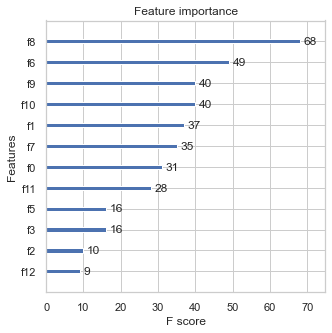

In [40]:
print_keys(keys)
xgb.plot_importance(model)
# xgb.plot_importance(model._Booster)

In [41]:
import graphviz
dot = graphviz.Digraph('round-table', comment='The Round Table')  
# dot

0 : danceability
1 : energy
2 : key
3 : loudness
4 : mode
5 : speechiness
6 : acousticness
7 : instrumentalness
8 : liveness
9 : valence
10 : tempo
11 : duration_ms
12 : time_signature


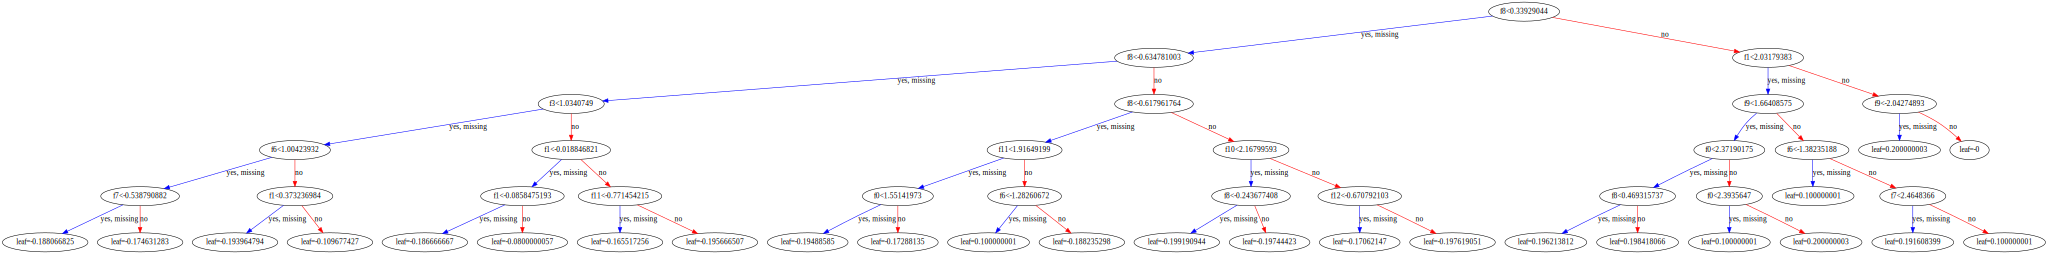

In [43]:
print_keys(keys)
xgb.to_graphviz(model)

In [40]:
live_data = data[data['live']==1]
print(live_data['liveness'].max())

4.743194726488755


In [37]:
df_print_info(data, 'liveness')

[max/min/mean  ]----------------------------------------
liveness max  : 4.8217818995868384 
liveness min  : -1.2173400946427997 
liveness mean : 4.721774037981196e-15 
[quantile      ]----------------------------------------
0.05   -0.854026
0.25   -0.617660
0.50   -0.395197
0.75    0.336268
0.95    2.216315
Name: liveness, dtype: float64


# deep learning

In [415]:
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.nn.init import *
import numpy as np

In [416]:
#build dataset
class custom_dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        data = torch.Tensor(self.x[idx])
        label = torch.Tensor(self.y[idx].reshape(-1))
        
        return data, label
    
train_dataset = custom_dataset(x_tr, y_tr)
test_dataset = custom_dataset(x_tt, y_tt)
train_dataloader = DataLoader(train_dataset, batch_size=16)
test_dataloader = DataLoader(test_dataset, batch_size=16)

print(len(train_dataset))
print(len(test_dataset))

for i, (data, label) in enumerate(train_dataloader):
    x = data
    y = label
    print('x: ',type(x), x)
    print('y: ',type(y), y)
    
    if i > 1:
        break
    


118804
29702
x:  <class 'torch.Tensor'> tensor([[-0.0809,  0.6921, -1.4820,  0.3955,  0.6410, -0.0700,  0.6762, -0.5388,
         -0.9507,  0.8440,  1.1393, -0.7018,  0.2923],
        [-1.3719, -1.6962,  1.3715, -1.4247, -1.5601, -0.3525,  1.1059, -0.2405,
         -0.7386, -1.4533,  1.7916,  0.2560, -1.6339],
        [ 0.3704, -0.2821, -1.4820,  0.1957,  0.6410, -0.3417, -0.2787, -0.5388,
          1.2189,  0.1140,  0.0190, -0.1074,  0.2923],
        [ 0.6420,  0.7943, -1.4820,  1.0072, -1.5601,  1.1743, -0.1594, -0.5388,
         -0.7452, -0.7400,  2.1307,  0.1840,  0.2923],
        [ 0.0432, -1.2235,  0.6105, -0.7305, -1.5601, -0.1965,  1.2243,  2.2683,
         -0.4618, -0.5150, -1.1462, -0.3662,  0.2923],
        [-0.5801,  0.6050, -1.1966,  1.4119,  0.6410, -0.1954,  0.6762, -0.5388,
         -0.5524,  0.1498,  2.2933, -0.2430, -1.6339],
        [ 1.0838,  0.2832,  1.6569,  0.6833,  0.6410, -0.4087,  0.7425, -0.5388,
         -0.3771,  1.3655,  0.3720, -0.8901,  0.2923],
        

In [417]:
#define model
class Net(nn.Module):
    def __init__(self, cfg_model):
        super(Net, self).__init__()
        info = cfg_model
        l1 = info['l1']
        l2 = info['l2']
        l3 = info['l3']
        l4 = info['l4']
        self.dropout = info['dropout']
        self.fc1 = nn.Linear(l1[0], l1[1])
        self.fc2 = nn.Linear(l2[0], l2[1])
        self.fc3 = nn.Linear(l3[0], l3[1])
        self.fc4 = nn.Linear(l4[0], l4[1])
        
        self.BCEloss=nn.BCELoss()
        
    def forward(self, x):
        # print(x.shape)
        x = torch.unsqueeze(x, 0)
        
        x = torch.sigmoid(self.fc1(x))
        # x = F.dropout(x, training=self.training)
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x 
    
    def loss_fn(self, y_pred, y_true):
        y_pred = y_pred.view(-1).float()
        # y_pred = np.where(y_pred>0.5, 1, 0)
        y_true = y_true.view(-1).float()
        # print(y_pred, y_true)
        # print(y_pred.size(), y_true.size())
        loss = self.BCEloss(y_pred, y_true)
        return loss
        
model = Net(cfg.model)
test_pred=model(x)
loss = model.loss_fn(test_pred, y)
print(test_pred, loss)

tensor([[[0.4431],
         [0.4432],
         [0.4433],
         [0.4436],
         [0.4432],
         [0.4434],
         [0.4435],
         [0.4438],
         [0.4433],
         [0.4436],
         [0.4440],
         [0.4428],
         [0.4435],
         [0.4435],
         [0.4433],
         [0.4440]]], grad_fn=<SigmoidBackward0>) tensor(0.6710, grad_fn=<BinaryCrossEntropyBackward0>)


In [418]:
model = Net(cfg.model)
print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
print(optimizer)

Net(
  (fc1): Linear(in_features=13, out_features=26, bias=True)
  (fc2): Linear(in_features=26, out_features=13, bias=True)
  (fc3): Linear(in_features=13, out_features=6, bias=True)
  (fc4): Linear(in_features=6, out_features=1, bias=True)
  (BCEloss): BCELoss()
)
SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-06
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [419]:
config_path = '/Users/KC/My Drive/soundmouse/cfg_setting.py'
cfg = Config.fromfile(config_path)

epochs = cfg.epochs
fprint('epochs', epochs)
model.train()
for epoch in range(epochs):
    fprint('epoch', epoch)
    for i, (x, y_true) in tqdm(enumerate(train_dataloader)):
        y_pred = model(x)
        loss = model.loss_fn(y_pred, y_true)
        if i % cfg.interval == cfg.interval-1:
            print(epoch, loss)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    

39it [00:00, 385.94it/s]

epochs              : 10 
epoch               : 0 


1096it [00:02, 448.80it/s]

0 tensor(0.6621, grad_fn=<BinaryCrossEntropyBackward0>)


2099it [00:04, 695.15it/s]

0 tensor(0.7366, grad_fn=<BinaryCrossEntropyBackward0>)


2984it [00:05, 643.97it/s]

0 tensor(0.6621, grad_fn=<BinaryCrossEntropyBackward0>)


4037it [00:08, 381.33it/s]

0 tensor(0.8104, grad_fn=<BinaryCrossEntropyBackward0>)


5154it [00:09, 627.15it/s]

0 tensor(0.8845, grad_fn=<BinaryCrossEntropyBackward0>)


6106it [00:11, 676.78it/s]

0 tensor(0.7735, grad_fn=<BinaryCrossEntropyBackward0>)


7090it [00:12, 923.28it/s]

0 tensor(0.7731, grad_fn=<BinaryCrossEntropyBackward0>)


7426it [00:13, 543.31it/s]
9it [00:00, 88.66it/s]

epoch               : 1 


1036it [00:02, 558.18it/s]

1 tensor(0.6620, grad_fn=<BinaryCrossEntropyBackward0>)


2120it [00:03, 807.56it/s]

1 tensor(0.7362, grad_fn=<BinaryCrossEntropyBackward0>)


3129it [00:05, 731.23it/s]

1 tensor(0.6621, grad_fn=<BinaryCrossEntropyBackward0>)


4143it [00:07, 830.21it/s]

1 tensor(0.8097, grad_fn=<BinaryCrossEntropyBackward0>)


5105it [00:08, 656.63it/s]

1 tensor(0.8835, grad_fn=<BinaryCrossEntropyBackward0>)


6148it [00:10, 907.62it/s]

1 tensor(0.7730, grad_fn=<BinaryCrossEntropyBackward0>)


7067it [00:12, 353.72it/s]

1 tensor(0.7726, grad_fn=<BinaryCrossEntropyBackward0>)


7426it [00:12, 571.74it/s]
56it [00:00, 556.01it/s]

epoch               : 2 


1069it [00:02, 449.79it/s]

2 tensor(0.6620, grad_fn=<BinaryCrossEntropyBackward0>)


2089it [00:04, 384.52it/s]

2 tensor(0.7358, grad_fn=<BinaryCrossEntropyBackward0>)


3019it [00:06, 459.22it/s]

2 tensor(0.6620, grad_fn=<BinaryCrossEntropyBackward0>)


4044it [00:08, 671.88it/s]

2 tensor(0.8090, grad_fn=<BinaryCrossEntropyBackward0>)


5124it [00:10, 720.03it/s]

2 tensor(0.8825, grad_fn=<BinaryCrossEntropyBackward0>)


6011it [00:11, 723.79it/s]

2 tensor(0.7724, grad_fn=<BinaryCrossEntropyBackward0>)


7083it [00:14, 530.87it/s]

2 tensor(0.7721, grad_fn=<BinaryCrossEntropyBackward0>)


7426it [00:15, 484.96it/s]
29it [00:00, 285.71it/s]

epoch               : 3 


1058it [00:03, 273.60it/s]

3 tensor(0.6619, grad_fn=<BinaryCrossEntropyBackward0>)


2100it [00:05, 679.93it/s]

3 tensor(0.7355, grad_fn=<BinaryCrossEntropyBackward0>)


3037it [00:08, 241.11it/s]

3 tensor(0.6620, grad_fn=<BinaryCrossEntropyBackward0>)


4039it [00:10, 580.92it/s]

3 tensor(0.8083, grad_fn=<BinaryCrossEntropyBackward0>)


5030it [00:12, 513.08it/s]

3 tensor(0.8815, grad_fn=<BinaryCrossEntropyBackward0>)


6076it [00:14, 627.68it/s]

3 tensor(0.7719, grad_fn=<BinaryCrossEntropyBackward0>)


7056it [00:17, 375.68it/s]

3 tensor(0.7715, grad_fn=<BinaryCrossEntropyBackward0>)


7426it [00:17, 423.10it/s]
17it [00:00, 135.89it/s]

epoch               : 4 


1136it [00:02, 686.03it/s]

4 tensor(0.6619, grad_fn=<BinaryCrossEntropyBackward0>)


2110it [00:04, 703.95it/s]

4 tensor(0.7351, grad_fn=<BinaryCrossEntropyBackward0>)


3107it [00:06, 461.77it/s]

4 tensor(0.6619, grad_fn=<BinaryCrossEntropyBackward0>)


4097it [00:07, 659.59it/s]

4 tensor(0.8076, grad_fn=<BinaryCrossEntropyBackward0>)


5173it [00:09, 878.14it/s]

4 tensor(0.8805, grad_fn=<BinaryCrossEntropyBackward0>)


6141it [00:12, 668.37it/s]

4 tensor(0.7714, grad_fn=<BinaryCrossEntropyBackward0>)


7077it [00:14, 748.44it/s]

4 tensor(0.7710, grad_fn=<BinaryCrossEntropyBackward0>)


7426it [00:14, 505.59it/s]
11it [00:00, 68.22it/s]

epoch               : 5 


1078it [00:02, 588.60it/s]

5 tensor(0.6618, grad_fn=<BinaryCrossEntropyBackward0>)


2039it [00:04, 464.19it/s]

5 tensor(0.7348, grad_fn=<BinaryCrossEntropyBackward0>)


3064it [00:07, 516.95it/s]

5 tensor(0.6619, grad_fn=<BinaryCrossEntropyBackward0>)


4128it [00:08, 613.28it/s]

5 tensor(0.8069, grad_fn=<BinaryCrossEntropyBackward0>)


5095it [00:10, 679.22it/s]

5 tensor(0.8795, grad_fn=<BinaryCrossEntropyBackward0>)


6146it [00:12, 729.16it/s]

5 tensor(0.7709, grad_fn=<BinaryCrossEntropyBackward0>)


7153it [00:14, 724.28it/s]

5 tensor(0.7705, grad_fn=<BinaryCrossEntropyBackward0>)


7426it [00:14, 497.06it/s]
48it [00:00, 475.66it/s]

epoch               : 6 


1062it [00:01, 556.44it/s]

6 tensor(0.6618, grad_fn=<BinaryCrossEntropyBackward0>)


2056it [00:03, 433.24it/s]

6 tensor(0.7344, grad_fn=<BinaryCrossEntropyBackward0>)


3082it [00:05, 588.02it/s]

6 tensor(0.6618, grad_fn=<BinaryCrossEntropyBackward0>)


3224it [00:06, 535.77it/s]


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
    test_y_pred=[]
    test_y_true=[]
    for i, (x, y_true) in tqdm(enumerate(test_dataloader)):
        y_pred = model(x)
        test_y_pred.append(y_pred)
        test_y_true.append(y_true)
        loss = model.loss_fn(y_pred, y_true)
        print(loss)
        

41it [00:00, 407.27it/s]

tensor(0.7643)
tensor(0.6881)
tensor(0.6881)
tensor(0.8156)
tensor(0.6374)
tensor(0.7400)
tensor(0.7390)
tensor(0.7392)
tensor(0.7136)
tensor(0.7134)
tensor(0.6631)
tensor(0.7391)
tensor(0.7392)
tensor(0.7645)
tensor(0.6883)
tensor(0.7136)
tensor(0.7136)
tensor(0.7394)
tensor(0.6882)
tensor(0.7391)
tensor(0.6627)
tensor(0.7389)
tensor(0.7138)
tensor(0.6882)
tensor(0.7143)
tensor(0.7645)
tensor(0.7136)
tensor(0.6110)
tensor(0.7397)
tensor(0.7135)
tensor(0.7646)
tensor(0.6881)
tensor(0.7391)
tensor(0.7389)
tensor(0.6623)
tensor(0.7390)
tensor(0.8412)
tensor(0.7643)
tensor(0.7138)
tensor(0.7135)
tensor(0.7899)
tensor(0.6883)
tensor(0.7130)
tensor(0.7650)
tensor(0.6628)
tensor(0.7136)
tensor(0.7391)
tensor(0.7902)
tensor(0.6878)
tensor(0.6884)
tensor(0.6371)
tensor(0.6117)
tensor(0.6883)
tensor(0.7648)
tensor(0.6371)
tensor(0.6881)
tensor(0.7129)
tensor(0.7644)
tensor(0.7898)
tensor(0.6627)
tensor(0.6881)
tensor(0.7644)
tensor(0.6881)
tensor(0.7387)
tensor(0.6881)
tensor(0.7140)
tensor(0.6

115it [00:00, 302.90it/s]


tensor(0.6878)
tensor(0.7390)
tensor(0.7133)
tensor(0.7395)
tensor(0.7394)
tensor(0.6622)
tensor(0.7645)
tensor(0.6881)
tensor(0.7391)
tensor(0.6118)
tensor(0.7135)
tensor(0.8153)
tensor(0.7391)
tensor(0.6884)
tensor(0.6626)
tensor(0.7391)
tensor(0.7644)
tensor(0.7899)
tensor(0.7389)
tensor(0.7389)
tensor(0.7135)
tensor(0.7394)
tensor(0.6622)
tensor(0.6627)
tensor(0.7643)
tensor(0.6373)
tensor(0.7642)
tensor(0.6367)
tensor(0.7131)
tensor(0.7391)
tensor(0.7397)
tensor(0.7647)
tensor(0.7138)
tensor(0.7394)
tensor(0.7902)
tensor(0.6884)
tensor(0.7138)
tensor(0.7129)
tensor(0.7133)
tensor(0.7393)
tensor(0.6369)
tensor(0.7135)
tensor(0.7135)
tensor(0.6879)
tensor(0.7131)
tensor(0.7136)
tensor(0.6625)
tensor(0.7389)
tensor(0.7135)
tensor(0.7140)
tensor(0.7388)
tensor(0.7136)
tensor(0.6882)
tensor(0.7395)
tensor(0.6880)
tensor(0.7137)
tensor(0.6366)
tensor(0.7135)
tensor(0.6879)
tensor(0.6881)
tensor(0.7393)
tensor(0.6879)
tensor(0.7139)
tensor(0.7137)
tensor(0.6626)
tensor(0.6622)
tensor(0.

274it [00:00, 571.28it/s]

tensor(0.7648)
tensor(0.7390)
tensor(0.7646)
tensor(0.6115)
tensor(0.7136)
tensor(0.6111)
tensor(0.7648)
tensor(0.8157)
tensor(0.6881)
tensor(0.7648)
tensor(0.7396)
tensor(0.7140)
tensor(0.7391)
tensor(0.7903)
tensor(0.6881)
tensor(0.6629)
tensor(0.7394)
tensor(0.6885)
tensor(0.7393)
tensor(0.7138)
tensor(0.7388)
tensor(0.6880)
tensor(0.6632)
tensor(0.7646)
tensor(0.7900)
tensor(0.7145)
tensor(0.6626)
tensor(0.7639)
tensor(0.7645)
tensor(0.7387)
tensor(0.6631)
tensor(0.6626)
tensor(0.6631)
tensor(0.6885)
tensor(0.7134)
tensor(0.6880)
tensor(0.6626)
tensor(0.6879)
tensor(0.7393)
tensor(0.7904)
tensor(0.6115)
tensor(0.7644)
tensor(0.7394)
tensor(0.7397)
tensor(0.7134)
tensor(0.7396)
tensor(0.6623)
tensor(0.7393)
tensor(0.7645)
tensor(0.7387)
tensor(0.7133)
tensor(0.7134)
tensor(0.7388)
tensor(0.6628)
tensor(0.7645)
tensor(0.7391)
tensor(0.6878)
tensor(0.7386)
tensor(0.6625)
tensor(0.6625)
tensor(0.7134)
tensor(0.7130)
tensor(0.7904)
tensor(0.7390)
tensor(0.6883)
tensor(0.7643)
tensor(0.6

428it [00:00, 673.16it/s]

tensor(0.8154)
tensor(0.7393)
tensor(0.6882)
tensor(0.6879)
tensor(0.6629)
tensor(0.7642)
tensor(0.7643)
tensor(0.6887)
tensor(0.7648)
tensor(0.7646)
tensor(0.7137)
tensor(0.7389)
tensor(0.7138)
tensor(0.6371)
tensor(0.7389)
tensor(0.7397)
tensor(0.7139)
tensor(0.7133)
tensor(0.7387)
tensor(0.6880)
tensor(0.7906)
tensor(0.7645)
tensor(0.6875)
tensor(0.7388)
tensor(0.6885)
tensor(0.7389)
tensor(0.6370)
tensor(0.7135)
tensor(0.7139)
tensor(0.6878)
tensor(0.7904)
tensor(0.7139)
tensor(0.7393)
tensor(0.6630)
tensor(0.7133)
tensor(0.6880)
tensor(0.7134)
tensor(0.7133)
tensor(0.6879)
tensor(0.6880)
tensor(0.7387)
tensor(0.6883)
tensor(0.7648)
tensor(0.7387)
tensor(0.7136)
tensor(0.6370)
tensor(0.7898)
tensor(0.6883)
tensor(0.6884)
tensor(0.8409)
tensor(0.7385)
tensor(0.6881)
tensor(0.7141)
tensor(0.6887)
tensor(0.7639)
tensor(0.6620)
tensor(0.7135)
tensor(0.6366)
tensor(0.7393)
tensor(0.7133)
tensor(0.6626)
tensor(0.7141)
tensor(0.7646)
tensor(0.6374)
tensor(0.6877)
tensor(0.7644)
tensor(0.6

595it [00:00, 731.21it/s]

tensor(0.6880)
tensor(0.6882)
tensor(0.5857)
tensor(0.6881)
tensor(0.6369)
tensor(0.8407)
tensor(0.6882)
tensor(0.7398)
tensor(0.7897)
tensor(0.6886)
tensor(0.6626)
tensor(0.8154)
tensor(0.6368)
tensor(0.7388)
tensor(0.6627)
tensor(0.7647)
tensor(0.7395)
tensor(0.7392)
tensor(0.7902)
tensor(0.7136)
tensor(0.7392)
tensor(0.6628)
tensor(0.6880)
tensor(0.6622)
tensor(0.7901)
tensor(0.7645)
tensor(0.6623)
tensor(0.6622)
tensor(0.6630)
tensor(0.7140)
tensor(0.6376)
tensor(0.7395)
tensor(0.7137)
tensor(0.7900)
tensor(0.6883)
tensor(0.6879)
tensor(0.6882)
tensor(0.7134)
tensor(0.7392)
tensor(0.7134)
tensor(0.7383)
tensor(0.7644)
tensor(0.6883)
tensor(0.6373)
tensor(0.6370)
tensor(0.7646)
tensor(0.6882)
tensor(0.6882)
tensor(0.7394)
tensor(0.7131)
tensor(0.8151)
tensor(0.6878)
tensor(0.7392)
tensor(0.7135)
tensor(0.7902)
tensor(0.7900)
tensor(0.7139)
tensor(0.6880)
tensor(0.7138)
tensor(0.7902)
tensor(0.7389)
tensor(0.7645)
tensor(0.6371)
tensor(0.7644)
tensor(0.7139)
tensor(0.8157)
tensor(0.7

767it [00:01, 770.25it/s]

tensor(0.7647)
tensor(0.6883)
tensor(0.6626)
tensor(0.7898)
tensor(0.6626)
tensor(0.6369)
tensor(0.7136)
tensor(0.7395)
tensor(0.7132)
tensor(0.7398)
tensor(0.7898)
tensor(0.6368)
tensor(0.7137)
tensor(0.7400)
tensor(0.5860)
tensor(0.7138)
tensor(0.7903)
tensor(0.7385)
tensor(0.7644)
tensor(0.6121)
tensor(0.7900)
tensor(0.6370)
tensor(0.7132)
tensor(0.6117)
tensor(0.6624)
tensor(0.6884)
tensor(0.7384)
tensor(0.6877)
tensor(0.6372)
tensor(0.7138)
tensor(0.7903)
tensor(0.7388)
tensor(0.6626)
tensor(0.7392)
tensor(0.6879)
tensor(0.6120)
tensor(0.8413)
tensor(0.7139)
tensor(0.7391)
tensor(0.7648)
tensor(0.7391)
tensor(0.7137)
tensor(0.6881)
tensor(0.6621)
tensor(0.7899)
tensor(0.7642)
tensor(0.7387)
tensor(0.7141)
tensor(0.6882)
tensor(0.6369)
tensor(0.6886)
tensor(0.6624)
tensor(0.7657)
tensor(0.6118)
tensor(0.7141)
tensor(0.7136)
tensor(0.6369)
tensor(0.6118)
tensor(0.7392)
tensor(0.6881)
tensor(0.7647)
tensor(0.5606)
tensor(0.6877)
tensor(0.6627)
tensor(0.6626)
tensor(0.6884)
tensor(0.7

851it [00:01, 790.41it/s]

tensor(0.7138)
tensor(0.7391)
tensor(0.6621)
tensor(0.6879)
tensor(0.6882)
tensor(0.7134)
tensor(0.7385)
tensor(0.7652)
tensor(0.6881)
tensor(0.7645)
tensor(0.6365)
tensor(0.7645)
tensor(0.6635)
tensor(0.6372)
tensor(0.6877)
tensor(0.7394)
tensor(0.7391)
tensor(0.7649)
tensor(0.6877)
tensor(0.6367)
tensor(0.7139)
tensor(0.7392)
tensor(0.7646)
tensor(0.7392)
tensor(0.7646)
tensor(0.7392)
tensor(0.6880)
tensor(0.6878)
tensor(0.6627)
tensor(0.7393)
tensor(0.6369)
tensor(0.7647)
tensor(0.6375)
tensor(0.6882)
tensor(0.6624)
tensor(0.8154)
tensor(0.7139)
tensor(0.7640)
tensor(0.7899)
tensor(0.7394)
tensor(0.6115)
tensor(0.6372)
tensor(0.7138)
tensor(0.7895)
tensor(0.6631)
tensor(0.6116)
tensor(0.6625)
tensor(0.8150)
tensor(0.7645)
tensor(0.7648)
tensor(0.6116)
tensor(0.7132)
tensor(0.7646)
tensor(0.7132)
tensor(0.7391)
tensor(0.7134)
tensor(0.7132)
tensor(0.7386)
tensor(0.7905)
tensor(0.7133)
tensor(0.6882)
tensor(0.7903)
tensor(0.7136)
tensor(0.7390)
tensor(0.8672)
tensor(0.6883)
tensor(0.7

931it [00:01, 477.61it/s]

tensor(0.7390)
tensor(0.6370)
tensor(0.6368)
tensor(0.7392)
tensor(0.7391)
tensor(0.7135)
tensor(0.7136)
tensor(0.7137)
tensor(0.6625)
tensor(0.7394)
tensor(0.6877)
tensor(0.7897)
tensor(0.7649)
tensor(0.6625)
tensor(0.7899)
tensor(0.7896)
tensor(0.7395)
tensor(0.7651)
tensor(0.6370)
tensor(0.7391)
tensor(0.6628)
tensor(0.6371)
tensor(0.7650)
tensor(0.6624)
tensor(0.6884)
tensor(0.6624)
tensor(0.7388)
tensor(0.7395)
tensor(0.6116)
tensor(0.6375)
tensor(0.7136)
tensor(0.7140)
tensor(0.6372)
tensor(0.7904)
tensor(0.7392)
tensor(0.7140)
tensor(0.7391)
tensor(0.7135)
tensor(0.7138)
tensor(0.6625)
tensor(0.7134)
tensor(0.6880)
tensor(0.8155)
tensor(0.7391)
tensor(0.7134)
tensor(0.6630)
tensor(0.6880)
tensor(0.6626)
tensor(0.7390)
tensor(0.7649)
tensor(0.8154)
tensor(0.6374)
tensor(0.7133)


1064it [00:01, 537.00it/s]

tensor(0.7648)
tensor(0.6883)
tensor(0.6878)
tensor(0.7390)
tensor(0.6879)
tensor(0.6370)
tensor(0.7383)
tensor(0.6879)
tensor(0.7900)
tensor(0.7644)
tensor(0.6633)
tensor(0.6883)
tensor(0.7387)
tensor(0.7133)
tensor(0.6620)
tensor(0.7136)
tensor(0.7137)
tensor(0.7391)
tensor(0.7391)
tensor(0.7391)
tensor(0.6622)
tensor(0.7136)
tensor(0.7397)
tensor(0.6372)
tensor(0.7141)
tensor(0.7389)
tensor(0.6627)
tensor(0.6878)
tensor(0.7134)
tensor(0.6622)
tensor(0.6373)
tensor(0.7385)
tensor(0.7135)
tensor(0.6883)
tensor(0.6367)
tensor(0.7135)
tensor(0.6880)
tensor(0.7141)
tensor(0.7130)
tensor(0.6881)
tensor(0.7391)
tensor(0.7393)
tensor(0.7645)
tensor(0.7136)
tensor(0.7133)
tensor(0.7134)
tensor(0.7391)
tensor(0.6628)
tensor(0.6887)
tensor(0.6631)
tensor(0.7391)
tensor(0.6878)
tensor(0.6621)
tensor(0.7396)
tensor(0.7134)
tensor(0.7647)
tensor(0.6880)
tensor(0.7899)
tensor(0.6883)
tensor(0.8153)
tensor(0.8657)
tensor(0.6884)
tensor(0.6375)
tensor(0.7136)
tensor(0.6629)
tensor(0.8155)
tensor(0.7

1216it [00:02, 631.14it/s]


tensor(0.7903)
tensor(0.7388)
tensor(0.6626)
tensor(0.6883)
tensor(0.6369)
tensor(0.7137)
tensor(0.7136)
tensor(0.7390)
tensor(0.7394)
tensor(0.6371)
tensor(0.6624)
tensor(0.7388)
tensor(0.5608)
tensor(0.6116)
tensor(0.7644)
tensor(0.6884)
tensor(0.7390)
tensor(0.7647)
tensor(0.7641)
tensor(0.7135)
tensor(0.6878)
tensor(0.7647)
tensor(0.7139)
tensor(0.6884)
tensor(0.7904)
tensor(0.7135)
tensor(0.6115)
tensor(0.6371)
tensor(0.6373)
tensor(0.6368)
tensor(0.6879)
tensor(0.7137)
tensor(0.7646)
tensor(0.7133)
tensor(0.7137)
tensor(0.7388)
tensor(0.6372)
tensor(0.7646)
tensor(0.6878)
tensor(0.6880)
tensor(0.7899)
tensor(0.7137)
tensor(0.6626)
tensor(0.7643)
tensor(0.6887)
tensor(0.7141)
tensor(0.7134)
tensor(0.7392)
tensor(0.6622)
tensor(0.7141)
tensor(0.6627)
tensor(0.7139)
tensor(0.6881)
tensor(0.7136)
tensor(0.8412)
tensor(0.6374)
tensor(0.6880)
tensor(0.7650)
tensor(0.8157)
tensor(0.7391)
tensor(0.6624)
tensor(0.8148)
tensor(0.6622)
tensor(0.7390)
tensor(0.7139)
tensor(0.6879)
tensor(0.

1344it [00:02, 469.08it/s]

tensor(0.7648)
tensor(0.7643)
tensor(0.7896)
tensor(0.6369)
tensor(0.6882)
tensor(0.7135)
tensor(0.7898)
tensor(0.7139)
tensor(0.7902)
tensor(0.7900)
tensor(0.7137)
tensor(0.7397)
tensor(0.7390)
tensor(0.7138)
tensor(0.7386)
tensor(0.6884)
tensor(0.7388)
tensor(0.7138)
tensor(0.7650)
tensor(0.8150)
tensor(0.7133)
tensor(0.7647)
tensor(0.6884)
tensor(0.8152)
tensor(0.6627)
tensor(0.6881)
tensor(0.7389)
tensor(0.7646)
tensor(0.7136)
tensor(0.7642)
tensor(0.6882)
tensor(0.6626)
tensor(0.5862)
tensor(0.7388)
tensor(0.7395)
tensor(0.6882)
tensor(0.7133)
tensor(0.6877)
tensor(0.7394)
tensor(0.7645)
tensor(0.6121)
tensor(0.7645)
tensor(0.7394)
tensor(0.7649)
tensor(0.7137)
tensor(0.6630)
tensor(0.7645)
tensor(0.6373)
tensor(0.7645)
tensor(0.7641)
tensor(0.7900)
tensor(0.6888)
tensor(0.7132)
tensor(0.7645)
tensor(0.7647)
tensor(0.7128)
tensor(0.8151)
tensor(0.7898)
tensor(0.6883)
tensor(0.7643)
tensor(0.6370)
tensor(0.6632)
tensor(0.6879)
tensor(0.6115)
tensor(0.6877)
tensor(0.7138)
tensor(0.6

1470it [00:02, 505.99it/s]

tensor(0.7387)
tensor(0.7651)
tensor(0.6885)
tensor(0.7902)
tensor(0.6884)
tensor(0.7132)
tensor(0.7645)
tensor(0.6622)
tensor(0.7137)
tensor(0.6119)
tensor(0.7136)
tensor(0.6884)
tensor(0.6372)
tensor(0.6881)
tensor(0.6626)
tensor(0.7140)
tensor(0.6878)
tensor(0.5861)
tensor(0.6375)
tensor(0.7388)
tensor(0.6883)
tensor(0.6878)
tensor(0.7904)
tensor(0.6880)
tensor(0.7137)
tensor(0.6369)
tensor(0.6887)
tensor(0.7645)
tensor(0.7132)
tensor(0.7643)
tensor(0.8152)
tensor(0.7130)
tensor(0.7641)
tensor(0.8153)
tensor(0.7135)
tensor(0.7387)
tensor(0.6879)
tensor(0.5860)
tensor(0.7136)
tensor(0.6368)
tensor(0.7132)
tensor(0.7647)
tensor(0.7899)
tensor(0.7395)
tensor(0.7643)
tensor(0.7649)
tensor(0.7135)
tensor(0.7904)
tensor(0.7137)
tensor(0.6881)
tensor(0.7643)
tensor(0.6369)
tensor(0.7639)
tensor(0.8413)
tensor(0.7392)
tensor(0.7135)
tensor(0.6625)
tensor(0.7392)
tensor(0.8151)
tensor(0.7392)
tensor(0.7136)
tensor(0.6877)
tensor(0.7137)
tensor(0.7646)
tensor(0.7393)
tensor(0.7386)
tensor(0.7

1534it [00:02, 537.95it/s]

tensor(0.8154)
tensor(0.7389)
tensor(0.8150)
tensor(0.6624)
tensor(0.7392)
tensor(0.7651)
tensor(0.6882)
tensor(0.7134)
tensor(0.6627)
tensor(0.7144)
tensor(0.7387)
tensor(0.7135)
tensor(0.7390)
tensor(0.6115)
tensor(0.7394)
tensor(0.7137)
tensor(0.8153)
tensor(0.7133)
tensor(0.7394)
tensor(0.7643)
tensor(0.6113)
tensor(0.6625)
tensor(0.6628)
tensor(0.6878)
tensor(0.6880)
tensor(0.6876)
tensor(0.7392)
tensor(0.7130)
tensor(0.7395)
tensor(0.7140)
tensor(0.7138)
tensor(0.6628)
tensor(0.7646)
tensor(0.7649)
tensor(0.6881)
tensor(0.8158)
tensor(0.6878)
tensor(0.7140)
tensor(0.7139)
tensor(0.6112)
tensor(0.6884)
tensor(0.7142)
tensor(0.7143)
tensor(0.7394)
tensor(0.7386)
tensor(0.7139)
tensor(0.7392)
tensor(0.7895)
tensor(0.8154)
tensor(0.7392)
tensor(0.6624)
tensor(0.6626)
tensor(0.6625)
tensor(0.6880)
tensor(0.7644)
tensor(0.6883)
tensor(0.6882)
tensor(0.6626)
tensor(0.7391)
tensor(0.6375)
tensor(0.7394)
tensor(0.7137)
tensor(0.7899)
tensor(0.7648)
tensor(0.7138)
tensor(0.7393)
tensor(0.7

1652it [00:03, 475.85it/s]

tensor(0.6368)
tensor(0.7387)
tensor(0.6879)
tensor(0.7137)
tensor(0.6877)
tensor(0.7137)
tensor(0.7135)
tensor(0.7386)
tensor(0.7392)
tensor(0.7912)
tensor(0.6881)
tensor(0.7389)
tensor(0.7139)
tensor(0.7390)
tensor(0.6879)
tensor(0.7390)
tensor(0.7645)
tensor(0.7389)
tensor(0.6373)
tensor(0.7902)
tensor(0.7388)
tensor(0.7395)
tensor(0.7138)
tensor(0.7391)
tensor(0.7134)
tensor(0.6625)
tensor(0.6628)
tensor(0.7134)
tensor(0.6377)
tensor(0.7641)
tensor(0.6370)
tensor(0.6885)
tensor(0.7133)
tensor(0.7645)
tensor(0.7132)
tensor(0.7387)
tensor(0.7647)
tensor(0.7646)
tensor(0.7897)
tensor(0.7131)
tensor(0.7642)
tensor(0.7137)
tensor(0.7391)
tensor(0.7646)
tensor(0.7136)
tensor(0.6370)
tensor(0.6878)
tensor(0.6883)
tensor(0.7647)
tensor(0.7643)
tensor(0.6371)
tensor(0.6372)
tensor(0.6374)
tensor(0.7142)
tensor(0.6882)
tensor(0.6880)
tensor(0.7394)
tensor(0.6629)
tensor(0.7647)
tensor(0.7135)
tensor(0.6369)
tensor(0.7643)
tensor(0.7136)
tensor(0.7136)
tensor(0.7390)
tensor(0.7135)
tensor(0.7

1827it [00:03, 640.04it/s]

tensor(0.7646)
tensor(0.8670)
tensor(0.7649)
tensor(0.5859)
tensor(0.6881)
tensor(0.6880)
tensor(0.6373)
tensor(0.6877)
tensor(0.6631)
tensor(0.7397)
tensor(0.6372)
tensor(0.7133)
tensor(0.6374)
tensor(0.7644)
tensor(0.6115)
tensor(0.7137)
tensor(0.6628)
tensor(0.7902)
tensor(0.7643)
tensor(0.7896)
tensor(0.7133)
tensor(0.6626)
tensor(0.7898)
tensor(0.7900)
tensor(0.7644)
tensor(0.6627)
tensor(0.7646)
tensor(0.5863)
tensor(0.6369)
tensor(0.7646)
tensor(0.7389)
tensor(0.6879)
tensor(0.6622)
tensor(0.7387)
tensor(0.7393)
tensor(0.7654)
tensor(0.6624)
tensor(0.7393)
tensor(0.7397)
tensor(0.6629)
tensor(0.7902)
tensor(0.7136)
tensor(0.6882)
tensor(0.6889)
tensor(0.7641)
tensor(0.7134)
tensor(0.7391)
tensor(0.6880)
tensor(0.7647)
tensor(0.6887)
tensor(0.7137)
tensor(0.6627)
tensor(0.7136)
tensor(0.7390)
tensor(0.7646)
tensor(0.6627)
tensor(0.6878)
tensor(0.7139)
tensor(0.7643)
tensor(0.6366)
tensor(0.7648)
tensor(0.7138)
tensor(0.7135)
tensor(0.6880)
tensor(0.6370)
tensor(0.6878)
tensor(0.6

2002it [00:03, 713.28it/s]

tensor(0.7649)
tensor(0.7132)
tensor(0.6629)
tensor(0.7392)
tensor(0.7643)
tensor(0.7387)
tensor(0.7391)
tensor(0.7902)
tensor(0.6886)
tensor(0.6115)
tensor(0.7138)
tensor(0.6629)
tensor(0.7140)
tensor(0.7394)
tensor(0.6881)
tensor(0.6626)
tensor(0.6376)
tensor(0.7898)
tensor(0.5862)
tensor(0.7643)
tensor(0.7641)
tensor(0.7135)
tensor(0.6632)
tensor(0.7141)
tensor(0.7905)
tensor(0.6879)
tensor(0.7900)
tensor(0.7901)
tensor(0.8156)
tensor(0.7395)
tensor(0.7395)
tensor(0.6626)
tensor(0.7390)
tensor(0.6879)
tensor(0.7393)
tensor(0.8154)
tensor(0.7648)
tensor(0.6881)
tensor(0.8411)
tensor(0.6887)
tensor(0.6372)
tensor(0.7138)
tensor(0.7391)
tensor(0.7134)
tensor(0.7388)
tensor(0.7134)
tensor(0.6629)
tensor(0.6375)
tensor(0.6880)
tensor(0.6880)
tensor(0.7136)
tensor(0.7901)
tensor(0.6881)
tensor(0.7649)
tensor(0.6370)
tensor(0.7644)
tensor(0.6882)
tensor(0.7389)
tensor(0.6884)
tensor(0.6885)
tensor(0.7900)
tensor(0.7903)
tensor(0.7134)
tensor(0.7391)
tensor(0.7643)
tensor(0.7649)
tensor(0.7

2191it [00:03, 808.12it/s]

tensor(0.6621)
tensor(0.6372)
tensor(0.7898)
tensor(0.6876)
tensor(0.6625)
tensor(0.6882)
tensor(0.7134)
tensor(0.6623)
tensor(0.6883)
tensor(0.7139)
tensor(0.6880)
tensor(0.7900)
tensor(0.7645)
tensor(0.7645)
tensor(0.7394)
tensor(0.6880)
tensor(0.6371)
tensor(0.7646)
tensor(0.7387)
tensor(0.7141)
tensor(0.6874)
tensor(0.7901)
tensor(0.7648)
tensor(0.7644)
tensor(0.7141)
tensor(0.7395)
tensor(0.7902)
tensor(0.7397)
tensor(0.6369)
tensor(0.7387)
tensor(0.7390)
tensor(0.6886)
tensor(0.7139)
tensor(0.7136)
tensor(0.6626)
tensor(0.6630)
tensor(0.6882)
tensor(0.6637)
tensor(0.6884)
tensor(0.6879)
tensor(0.7133)
tensor(0.6629)
tensor(0.6622)
tensor(0.7393)
tensor(0.7388)
tensor(0.7394)
tensor(0.6623)
tensor(0.7392)
tensor(0.6881)
tensor(0.6375)
tensor(0.6877)
tensor(0.7393)
tensor(0.7381)
tensor(0.6624)
tensor(0.6630)
tensor(0.7138)
tensor(0.6367)
tensor(0.7646)
tensor(0.6628)
tensor(0.7645)
tensor(0.6884)
tensor(0.6371)
tensor(0.7644)
tensor(0.7388)
tensor(0.7136)
tensor(0.7133)
tensor(0.6

2318it [00:03, 614.87it/s]

tensor(0.6628)
tensor(0.6620)
tensor(0.6880)
tensor(0.7648)
tensor(0.6879)
tensor(0.6621)
tensor(0.7905)
tensor(0.7139)
tensor(0.7391)
tensor(0.6883)
tensor(0.6115)
tensor(0.7903)
tensor(0.6114)
tensor(0.7136)
tensor(0.6627)
tensor(0.7387)
tensor(0.7648)
tensor(0.7900)
tensor(0.7136)
tensor(0.6117)
tensor(0.6371)
tensor(0.6878)
tensor(0.7136)
tensor(0.7390)
tensor(0.6881)
tensor(0.7644)
tensor(0.6120)
tensor(0.6626)
tensor(0.6879)
tensor(0.7387)
tensor(0.7134)
tensor(0.6625)
tensor(0.7647)
tensor(0.8152)
tensor(0.7394)
tensor(0.7392)
tensor(0.7390)
tensor(0.7643)
tensor(0.7390)
tensor(0.6116)
tensor(0.7393)
tensor(0.7136)
tensor(0.7395)
tensor(0.7394)
tensor(0.6624)
tensor(0.7135)
tensor(0.8156)
tensor(0.6369)
tensor(0.6368)
tensor(0.7137)
tensor(0.6371)
tensor(0.6623)
tensor(0.7390)
tensor(0.7139)
tensor(0.6881)
tensor(0.6626)
tensor(0.7649)
tensor(0.6883)
tensor(0.7647)
tensor(0.6883)
tensor(0.7394)
tensor(0.6879)
tensor(0.6882)
tensor(0.7136)
tensor(0.6881)
tensor(0.6879)
tensor(0.7